# CA2 Project Tweets

Library imports 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import sqlite3
import pandas as pd  
import numpy as np
plt.style.use('fivethirtyeight')
import seaborn as sns


%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)

# Data cleaning 

In [2]:
# Columns names
column_names = ["number", "_ids", "date", "flag", "user", "tweet"]

# CSV
df = pd.read_csv('ProjectTweets.csv', names=column_names)

In [3]:
df.head()

number        _ids                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       1  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       2  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       3  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       4  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                              tweet  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....

In [4]:
df.number.value_counts()

0          1
1066650    1
1066672    1
1066671    1
1066670    1
          ..
533331     1
533330     1
533329     1
533328     1
1599999    1
Name: number, Length: 1600000, dtype: int64

In [5]:
df.flag.value_counts()

NO_QUERY    1600000
Name: flag, dtype: int64

In [6]:
df.isnull().sum()

number    0
_ids      0
date      0
flag      0
user      0
tweet     0
dtype: int64

In [7]:
df.drop(['number','flag'],axis=1,inplace=True)

In [8]:
df.head()

_ids                          date             user  \
0  1467810369  Mon Apr 06 22:19:45 PDT 2009  _TheSpecialOne_   
1  1467810672  Mon Apr 06 22:19:49 PDT 2009    scotthamilton   
2  1467810917  Mon Apr 06 22:19:53 PDT 2009         mattycus   
3  1467811184  Mon Apr 06 22:19:57 PDT 2009          ElleCTF   
4  1467811193  Mon Apr 06 22:19:57 PDT 2009           Karoli   

                                               tweet  
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1  is upset that he can't update his Facebook by ...  
2  @Kenichan I dived many times for the ball. Man...  
3    my whole body feels itchy and like its on fire   
4  @nationwideclass no, it's not behaving at all....

Time and place extraction

In [9]:
print(df['date'].head())

0    Mon Apr 06 22:19:45 PDT 2009
1    Mon Apr 06 22:19:49 PDT 2009
2    Mon Apr 06 22:19:53 PDT 2009
3    Mon Apr 06 22:19:57 PDT 2009
4    Mon Apr 06 22:19:57 PDT 2009
Name: date, dtype: object


In [10]:
# Location
df['Location'] = df['date'].str[-8:-4]

df.head()

_ids                          date             user  \
0  1467810369  Mon Apr 06 22:19:45 PDT 2009  _TheSpecialOne_   
1  1467810672  Mon Apr 06 22:19:49 PDT 2009    scotthamilton   
2  1467810917  Mon Apr 06 22:19:53 PDT 2009         mattycus   
3  1467811184  Mon Apr 06 22:19:57 PDT 2009          ElleCTF   
4  1467811193  Mon Apr 06 22:19:57 PDT 2009           Karoli   

                                               tweet Location  
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...     PDT   
1  is upset that he can't update his Facebook by ...     PDT   
2  @Kenichan I dived many times for the ball. Man...     PDT   
3    my whole body feels itchy and like its on fire      PDT   
4  @nationwideclass no, it's not behaving at all....     PDT

In [11]:
df['date_str'] = df['date'].astype(str)

# Date
df['day'] = df['date_str'].str[7:10]
df['month'] = df['date_str'].str[4:7]
df['time'] = df['date_str'].str[11:20]
df['year'] = df['date_str'].str[24:30]

# Drop
df.drop('date_str', axis=1, inplace=True)

In [12]:
df.head()

_ids                          date             user  \
0  1467810369  Mon Apr 06 22:19:45 PDT 2009  _TheSpecialOne_   
1  1467810672  Mon Apr 06 22:19:49 PDT 2009    scotthamilton   
2  1467810917  Mon Apr 06 22:19:53 PDT 2009         mattycus   
3  1467811184  Mon Apr 06 22:19:57 PDT 2009          ElleCTF   
4  1467811193  Mon Apr 06 22:19:57 PDT 2009           Karoli   

                                               tweet Location  day month  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...     PDT    06   Apr   
1  is upset that he can't update his Facebook by ...     PDT    06   Apr   
2  @Kenichan I dived many times for the ball. Man...     PDT    06   Apr   
3    my whole body feels itchy and like its on fire      PDT    06   Apr   
4  @nationwideclass no, it's not behaving at all....     PDT    06   Apr   

        time  year  
0  22:19:45   2009  
1  22:19:49   2009  
2  22:19:53   2009  
3  22:19:57   2009  
4  22:19:57   2009

In [13]:
df['day'] = df['day'].str.strip()
df['month'] = df['month'].str.strip()
df['year'] = df['year'].str.strip()

Number of Tweets per Day per Month

In [14]:
import plotly.graph_objects as go

def plot_tweets_months(df):
    df_sorted = df.sort_values(by=['month', 'day'])

    tweets_per_day_month = df_sorted.groupby(['day', 'month']).size().reset_index(name='count')

    days = tweets_per_day_month['day']
    months = tweets_per_day_month['month']
    counts = tweets_per_day_month['count']

    fig = go.Figure()

    for m in months.unique():
        fig.add_trace(go.Scatter(x=days[months == m], y=counts[months == m], mode='markers+lines', name=f'Month {m}'))

    fig.update_layout(title='Number of Tweets per Day per Month',
                      xaxis_title='Day of Month',
                      yaxis_title='Number of Tweets',
                      legend_title='Month',
                      hovermode='x')

    fig.show()

plot_tweets_months(df)

Final format date

In [15]:
df['day'] = df['day'].str.strip()

date_string = df['day'] + ' ' + df['month'] + ' ' + df['year']

df['Date'] = pd.to_datetime(date_string, format='%d %b %Y')
df.drop(columns=['day', 'month', 'year', 'date'], inplace=True)

df.head()

_ids             user  \
0  1467810369  _TheSpecialOne_   
1  1467810672    scotthamilton   
2  1467810917         mattycus   
3  1467811184          ElleCTF   
4  1467811193           Karoli   

                                               tweet Location       time  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...     PDT   22:19:45    
1  is upset that he can't update his Facebook by ...     PDT   22:19:49    
2  @Kenichan I dived many times for the ball. Man...     PDT   22:19:53    
3    my whole body feels itchy and like its on fire      PDT   22:19:57    
4  @nationwideclass no, it's not behaving at all....     PDT   22:19:57    

        Date  
0 2009-04-06  
1 2009-04-06  
2 2009-04-06  
3 2009-04-06  
4 2009-04-06

In [16]:
df.head()

_ids             user  \
0  1467810369  _TheSpecialOne_   
1  1467810672    scotthamilton   
2  1467810917         mattycus   
3  1467811184          ElleCTF   
4  1467811193           Karoli   

                                               tweet Location       time  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...     PDT   22:19:45    
1  is upset that he can't update his Facebook by ...     PDT   22:19:49    
2  @Kenichan I dived many times for the ball. Man...     PDT   22:19:53    
3    my whole body feels itchy and like its on fire      PDT   22:19:57    
4  @nationwideclass no, it's not behaving at all....     PDT   22:19:57    

        Date  
0 2009-04-06  
1 2009-04-06  
2 2009-04-06  
3 2009-04-06  
4 2009-04-06

Month-wise Box Plot\n(The Seasonality

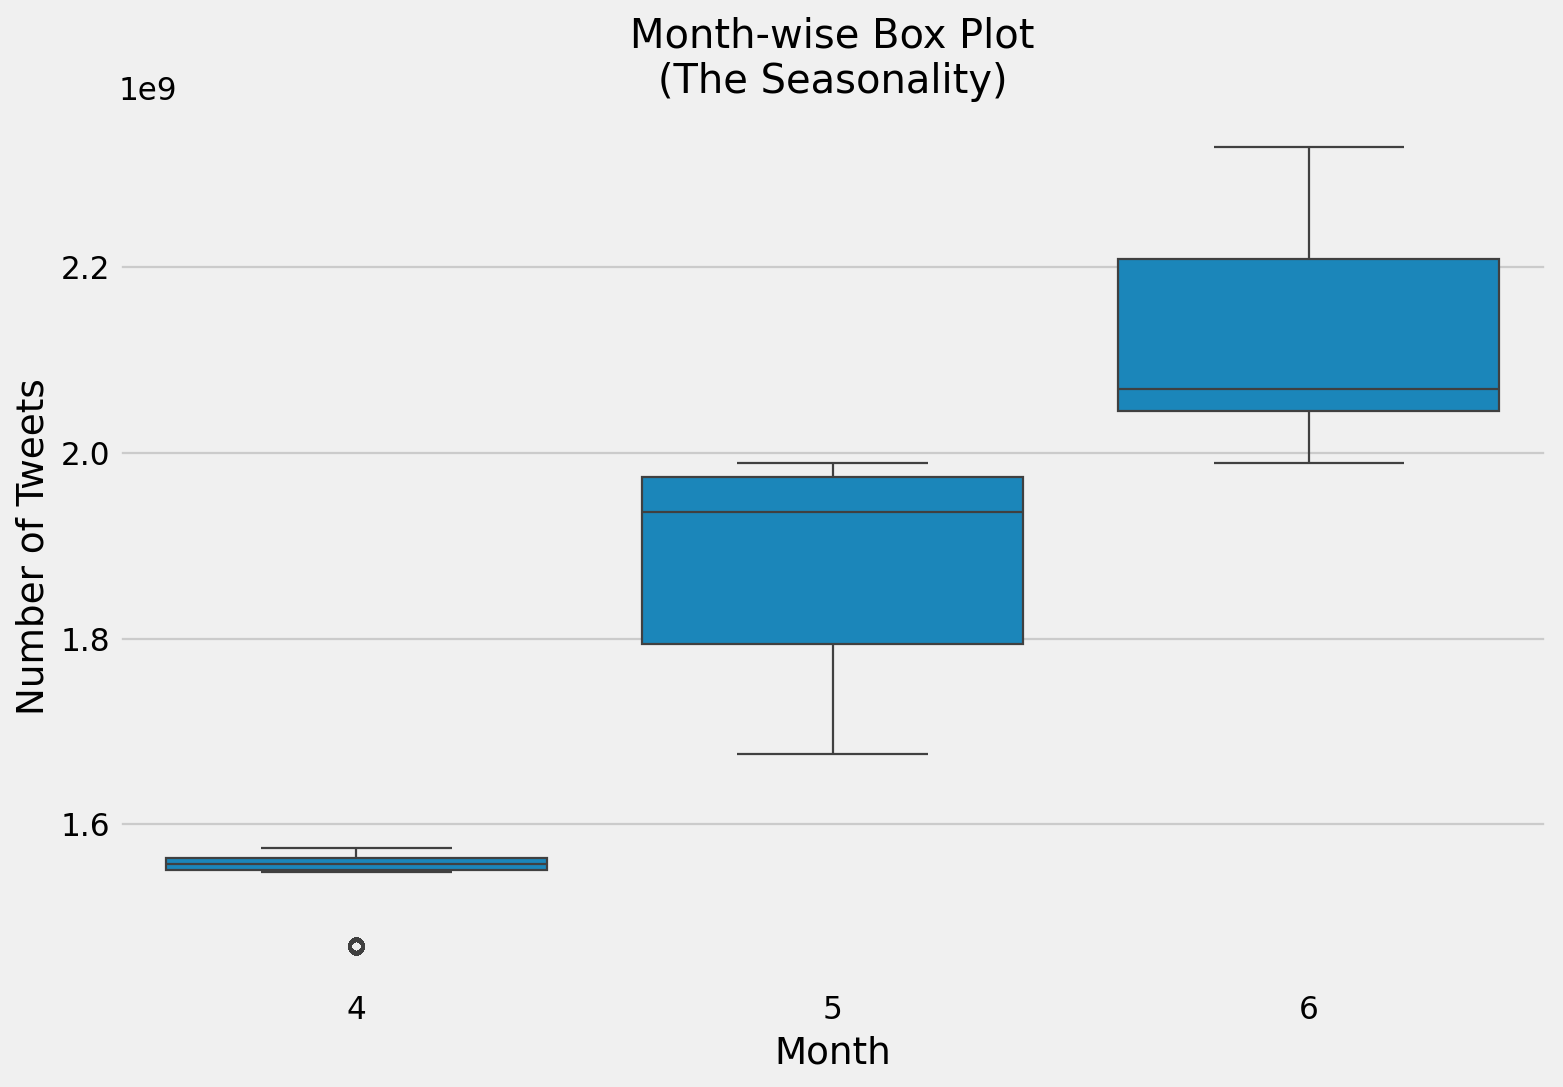

In [17]:
dfplot=df
# Preparar los datos
dfplot['Date'] = pd.to_datetime(dfplot['Date'])
dfplot['Month'] = dfplot['Date'].dt.month

# Crear el subplot solo para el gráfico por mes
fig, axes = plt.subplots(figsize=(10, 7), dpi=80)

# Boxplot para el mes
sns.boxplot(x='Month', y='_ids', data=dfplot, ax=axes)
axes.set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
axes.set_xlabel('Month')
axes.set_ylabel('Number of Tweets')

plt.tight_layout()
plt.show()

In [18]:
unique_count = df['Location'].nunique()
print("Locations:", unique_count)

Locations: 1


Number of Tweets per Date

In [19]:
df.drop('Location', axis=1, inplace=True)

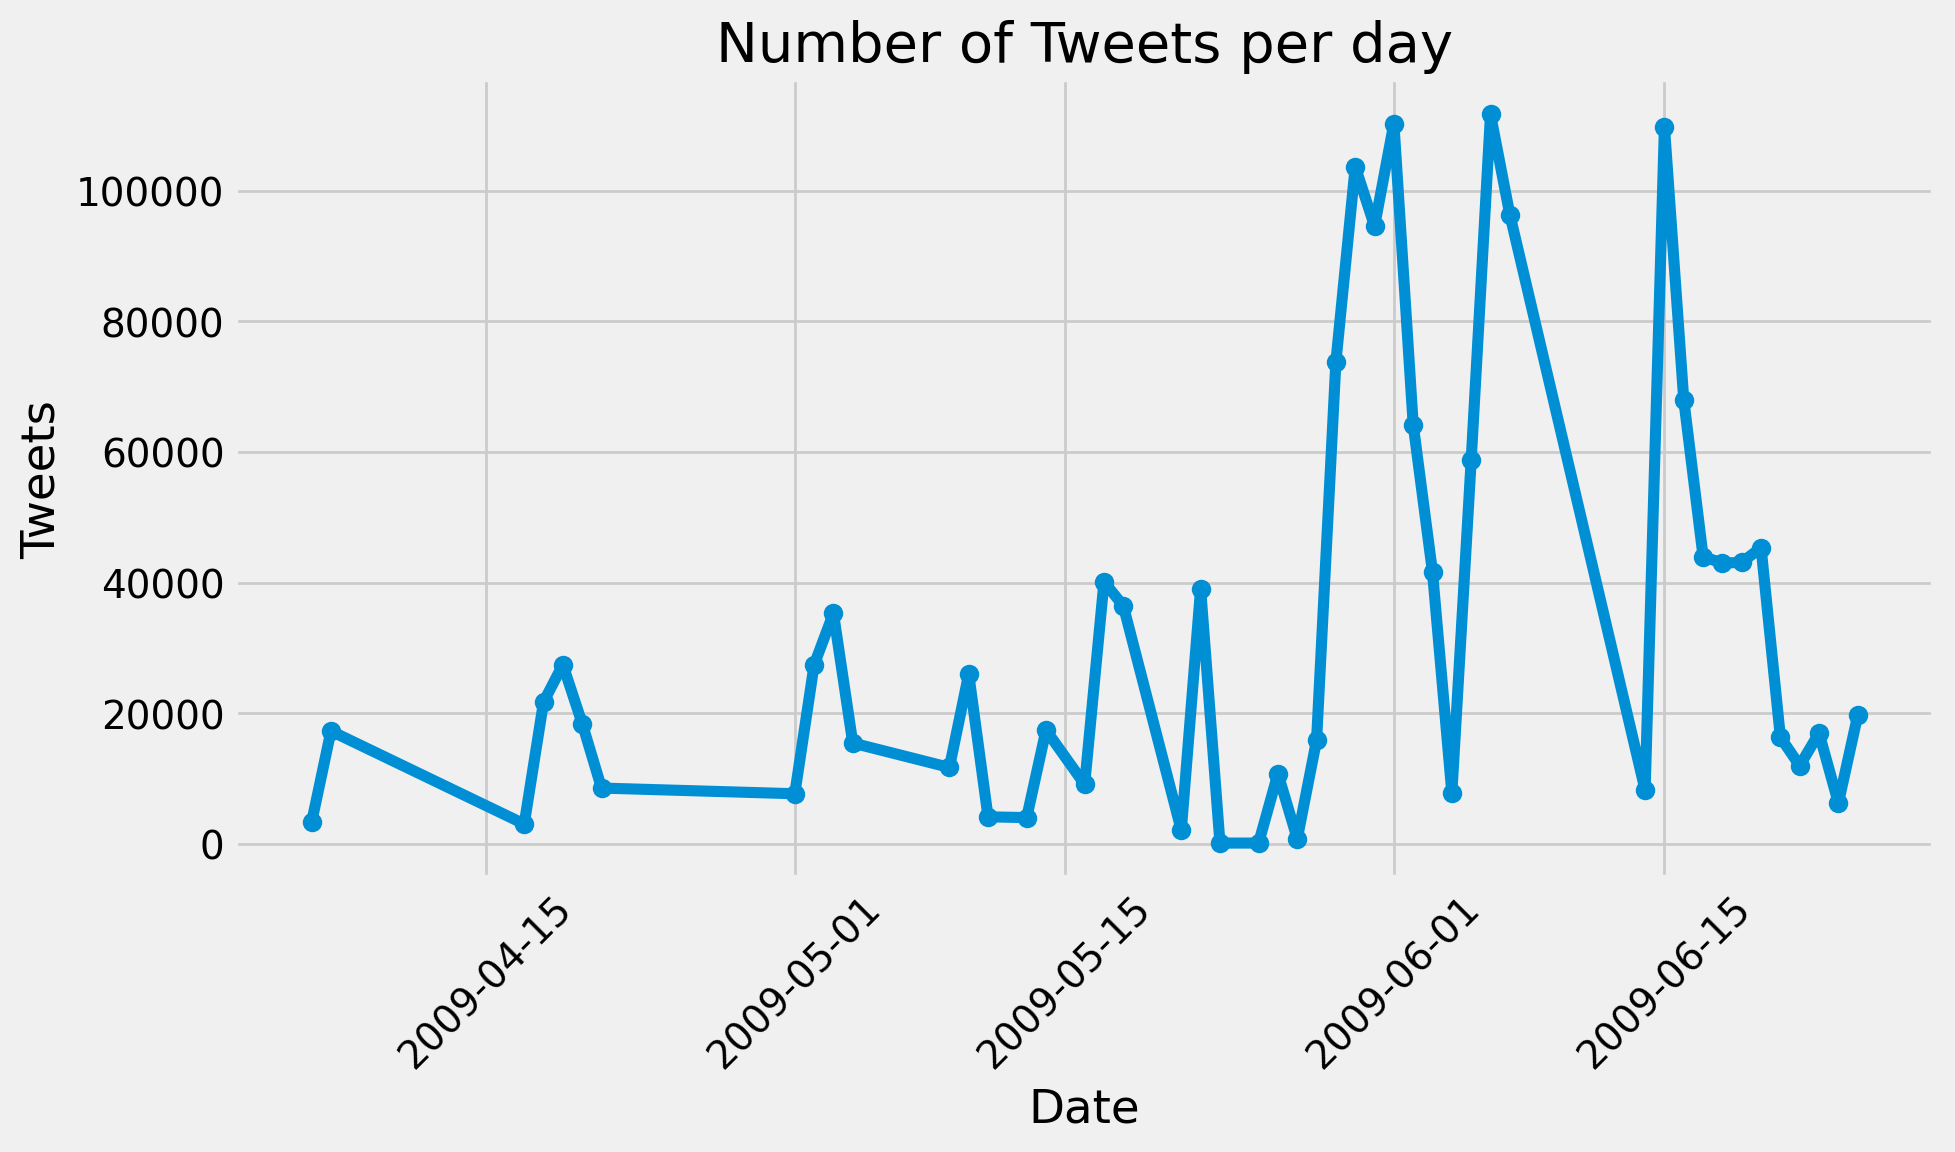

In [20]:
df['Date'] = pd.to_datetime(df['Date'])

tweets_per_date = df['Date'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
plt.plot(tweets_per_date.index, tweets_per_date.values, marker='o', linestyle='-')
plt.title('Number of Tweets per day')
plt.xlabel('Date')
plt.ylabel('Tweets')
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

In [21]:
!pip install textblob

# Sentimental Analysis

Text preprocessing

In [24]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

In [25]:
def preprocess_text(text):
    # lowercase 
    text = text.lower()
    # Mentions
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    # links
    text = re.sub(r'http\S+', '', text)
    # Characters and punctuation
    text = re.sub(r'[^A-Za-z0-9]+', ' ', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    return ' '.join(lemmatized_tokens)

def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['clean_text'] = df['tweet'].apply(preprocess_text)
df['sentiment_score'] = df['clean_text'].apply(analyze_sentiment)

df.to_csv('preprocessed_tweets.csv', index=False)
df.head()

_ids             user  \
0  1467810369  _TheSpecialOne_   
1  1467810672    scotthamilton   
2  1467810917         mattycus   
3  1467811184          ElleCTF   
4  1467811193           Karoli   

                                               tweet       time       Date  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...  22:19:45  2009-04-06   
1  is upset that he can't update his Facebook by ...  22:19:49  2009-04-06   
2  @Kenichan I dived many times for the ball. Man...  22:19:53  2009-04-06   
3    my whole body feels itchy and like its on fire   22:19:57  2009-04-06   
4  @nationwideclass no, it's not behaving at all....  22:19:57  2009-04-06   

   Month                                         clean_text  sentiment_score  
0      4       awww bummer shoulda got david carr third day            0.200  
1      4  upset update facebook texting might cry result...            0.000  
2      4  dived many time ball managed save 50 rest go b...            0.500  
3      4                    whole body feel itchy like fire            0.200  
4      4                                   behaving mad see           -0.625

In [26]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mara_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mara_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mara_\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df = pd.read_csv('preprocessed_tweets.csv')

In [3]:
df.head()

_ids             user  \
0  1467810369  _TheSpecialOne_   
1  1467810672    scotthamilton   
2  1467810917         mattycus   
3  1467811184          ElleCTF   
4  1467811193           Karoli   

                                               tweet       time        Date  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...  22:19:45   2009-04-06   
1  is upset that he can't update his Facebook by ...  22:19:49   2009-04-06   
2  @Kenichan I dived many times for the ball. Man...  22:19:53   2009-04-06   
3    my whole body feels itchy and like its on fire   22:19:57   2009-04-06   
4  @nationwideclass no, it's not behaving at all....  22:19:57   2009-04-06   

   Month                                         clean_text  sentiment_score  
0      4       awww bummer shoulda got david carr third day            0.200  
1      4  upset update facebook texting might cry result...            0.000  
2      4  dived many time ball managed save 50 rest go b...            0.500  
3      4                    whole body feel itchy like fire            0.200  
4      4                                   behaving mad see           -0.625

In [4]:
df['clean_text'].isnull().sum()

7912

TOP 20

In [5]:
from collections import Counter
import matplotlib.pyplot as plt

df2 = df.dropna(subset=['clean_text'])
all_words = ' '.join(df2['clean_text']).split()
word_freq = Counter(all_words)

# top 20
top_words = word_freq.most_common(20)

# list
words = [pair[0] for pair in top_words]
freqs = [pair[1] for pair in top_words]

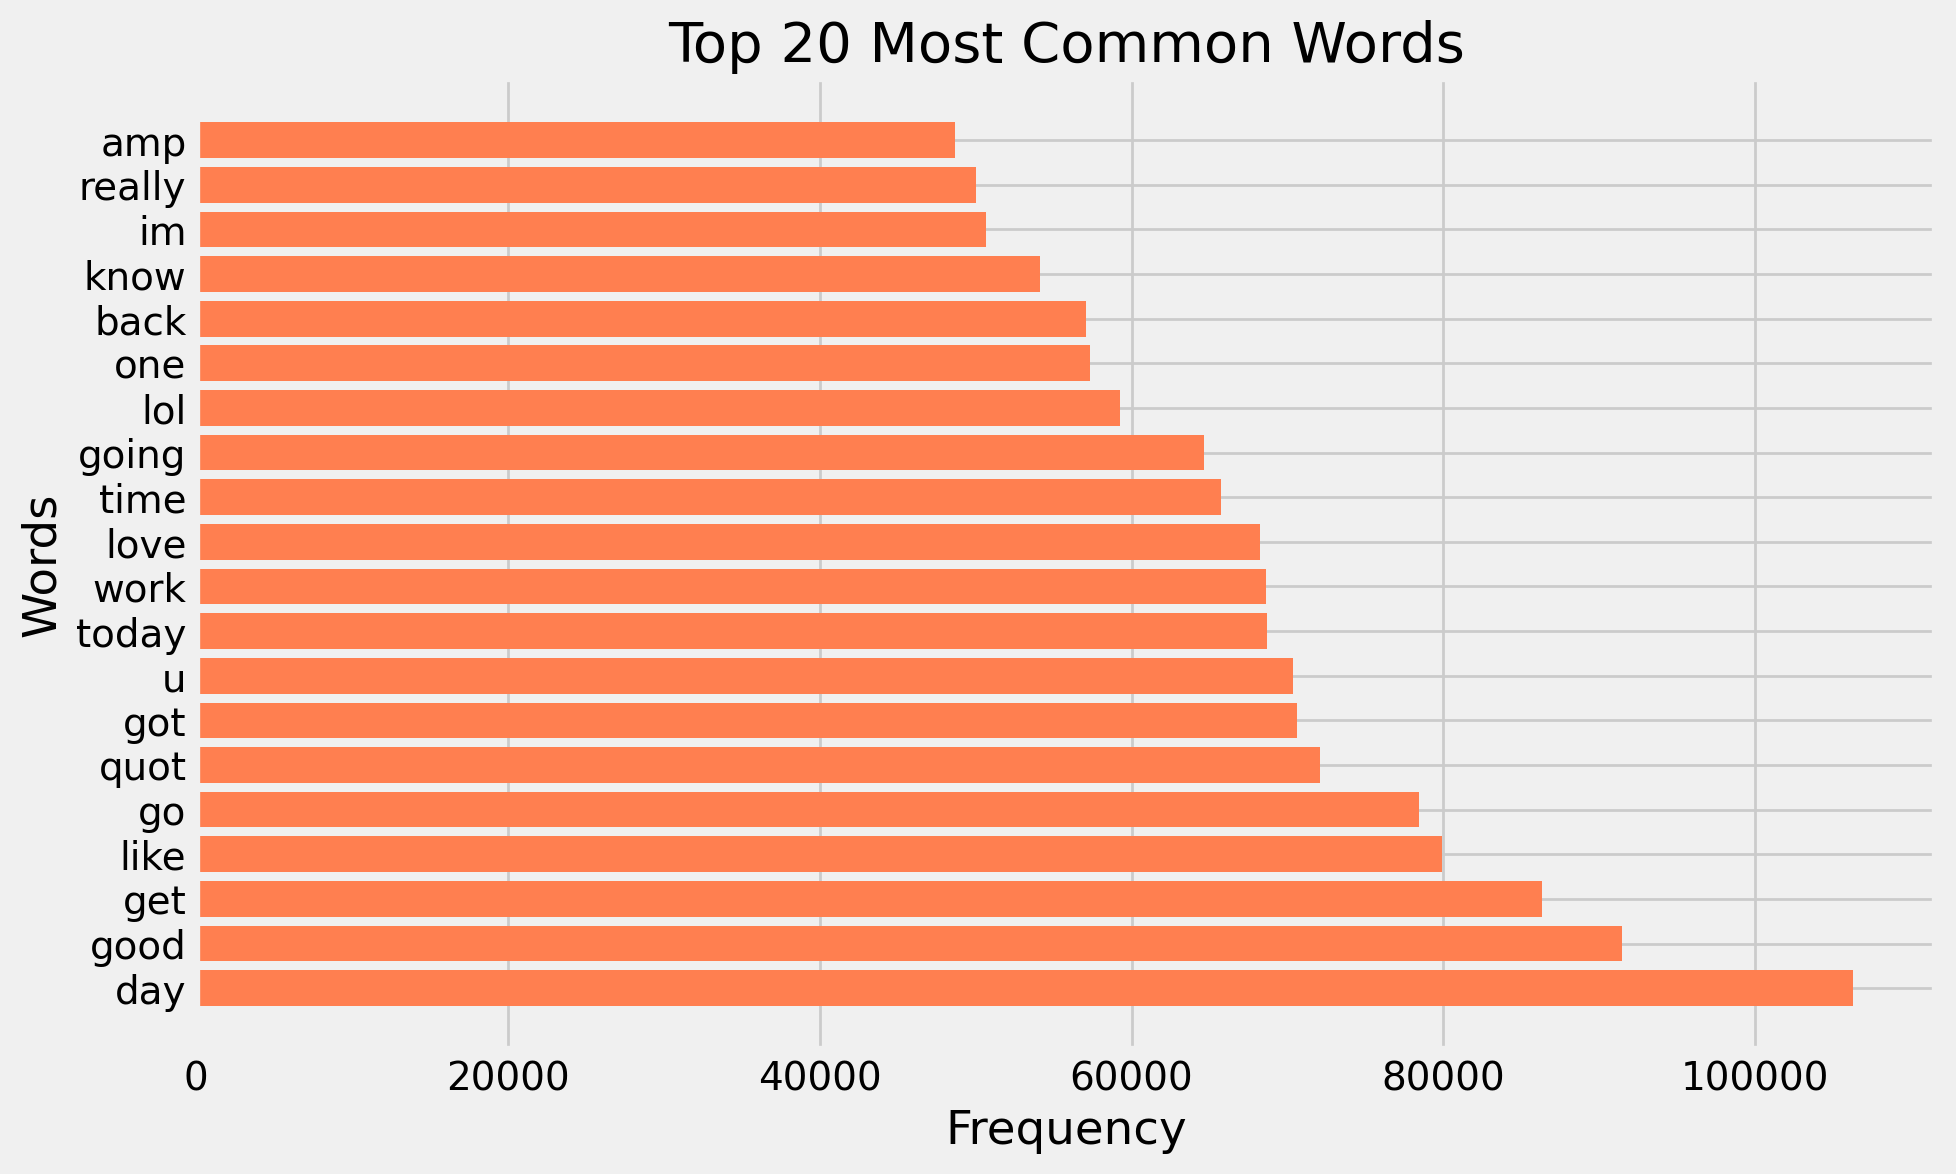

In [6]:
plt.figure(figsize=(10, 6))
plt.barh(words, freqs, color='coral')  # Usar plt.barh() para barras horizontales

plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Most Common Words')

plt.show()

In [7]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


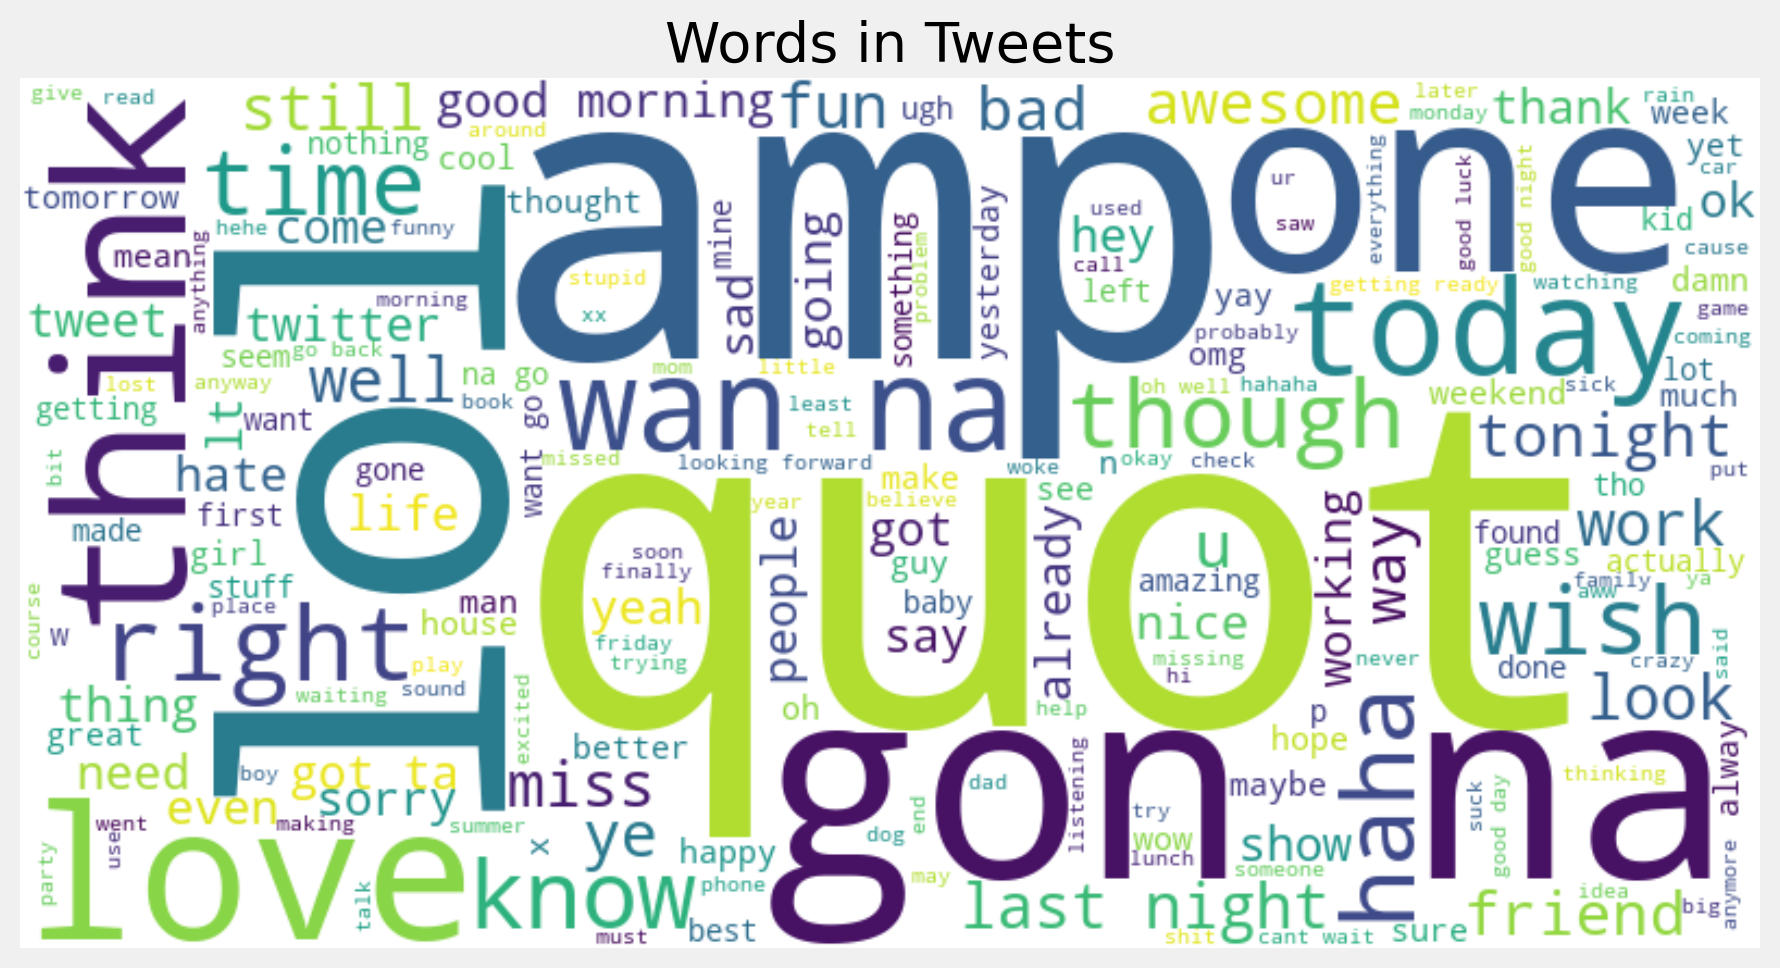

In [8]:
from wordcloud import WordCloud

# Sring
all_words = ' '.join(df2['clean_text'])

# cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.title('Words in Tweets')
plt.show()

Sentiment

In [9]:
def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df2['sentiment_category'] = df2['sentiment_score'].apply(categorize_sentiment)

sentiment_counts = df2['sentiment_category'].value_counts()

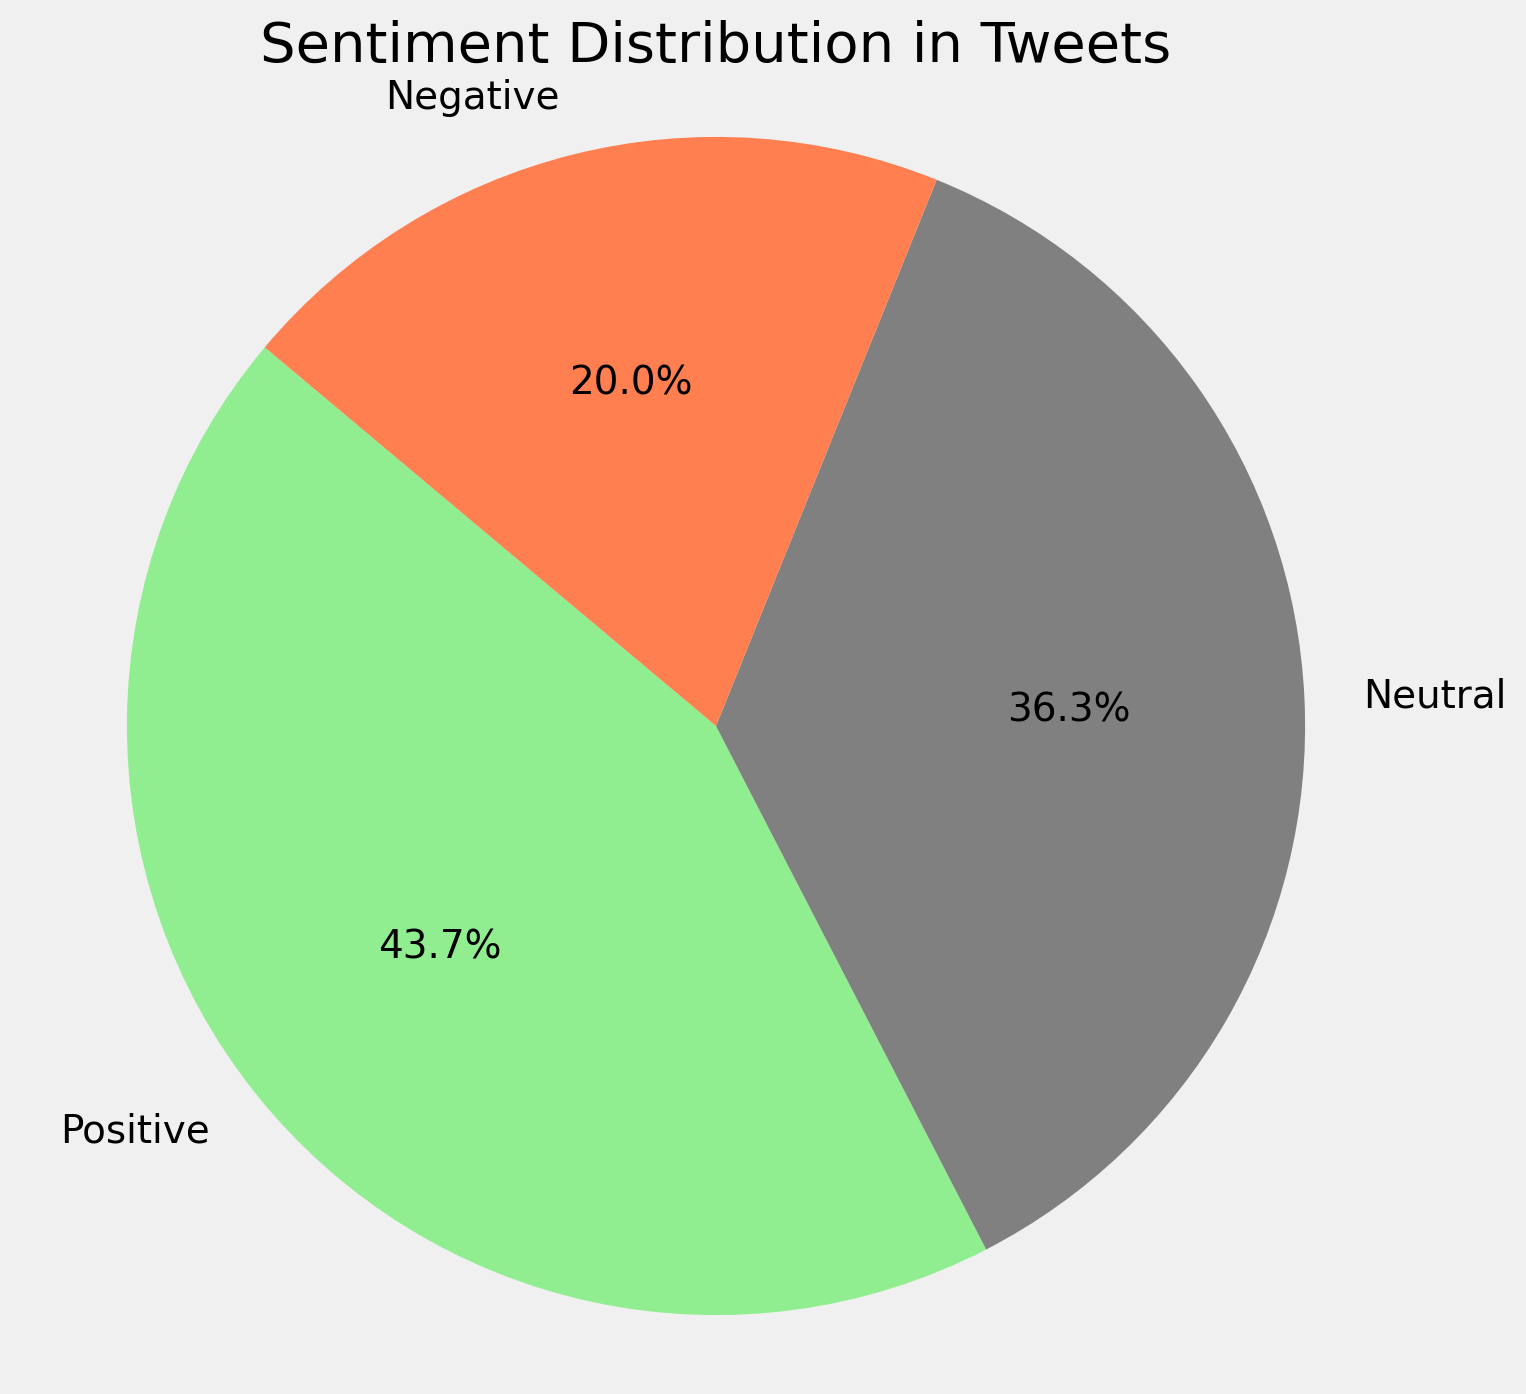

In [10]:
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'gray', 'coral'])
plt.title('Sentiment Distribution in Tweets')
plt.axis('equal')  
plt.show()

In [11]:
df2.head()

_ids             user  \
0  1467810369  _TheSpecialOne_   
1  1467810672    scotthamilton   
2  1467810917         mattycus   
3  1467811184          ElleCTF   
4  1467811193           Karoli   

                                               tweet       time        Date  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...  22:19:45   2009-04-06   
1  is upset that he can't update his Facebook by ...  22:19:49   2009-04-06   
2  @Kenichan I dived many times for the ball. Man...  22:19:53   2009-04-06   
3    my whole body feels itchy and like its on fire   22:19:57   2009-04-06   
4  @nationwideclass no, it's not behaving at all....  22:19:57   2009-04-06   

   Month                                         clean_text  sentiment_score  \
0      4       awww bummer shoulda got david carr third day            0.200   
1      4  upset update facebook texting might cry result...            0.000   
2      4  dived many time ball managed save 50 rest go b...            0.500   
3      4                    whole body feel itchy like fire            0.200   
4      4                                   behaving mad see           -0.625   

  sentiment_category  
0           Positive  
1            Neutral  
2           Positive  
3           Positive  
4           Negative

In [12]:
df_Positive = df2[df2['sentiment_category'] == 'Positive'][0:8000]
df_Neutral = df2[df2['sentiment_category'] == 'Neutral']
df_Negative = df2[df2['sentiment_category'] == 'Negative']

In [13]:
df_Neutral_over = df_Neutral.sample(8000, replace=True)
df_Negative_over = df_Negative.sample(8000, replace=True)
df2= pd.concat([df_Positive, df_Neutral_over, df_Negative_over], axis=0)

In [14]:
df3 = df2[['clean_text', 'sentiment_category']]
df3.head()

clean_text sentiment_category
0       awww bummer shoulda got david carr third day           Positive
2  dived many time ball managed save 50 rest go b...           Positive
3                    whole body feel itchy like fire           Positive
5                                         whole crew           Positive
7  hey long time see yes rain bit bit lol fine th...           Positive

In [15]:
df3.shape

(24000, 2)

Encoding on negative, neutral, and positive

In [16]:
one_hot = pd.get_dummies(df3["sentiment_category"])
df3.drop(['sentiment_category'],axis=1,inplace=True)
df3 = pd.concat([df3,one_hot],axis=1)
df3.head()

clean_text  Negative  Neutral  \
0       awww bummer shoulda got david carr third day         0        0   
2  dived many time ball managed save 50 rest go b...         0        0   
3                    whole body feel itchy like fire         0        0   
5                                         whole crew         0        0   
7  hey long time see yes rain bit bit lol fine th...         0        0   

   Positive  
0         1  
2         1  
3         1  
5         1  
7         1

In [17]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import cross_val_score
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.base import BaseEstimator, ClassifierMixin

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
#Train Test Split
X = df3['clean_text'].values
y = df3.drop('clean_text', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [25]:
#vectorization
vect = CountVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

In [26]:
#Frequency
tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
X_train = X_train.toarray()
X_test = X_test.toarray()

In [31]:
model = Sequential()

model.add(Dense(units=12673,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=4000,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=500,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=3, activation='softmax'))

opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

Fit the Model

In [32]:
history=model.fit(x=X_train, y=y_train, batch_size=256, epochs=10, validation_data=(X_test, y_test), verbose=1, callbacks=early_stop)

Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 404s 5s/step - accuracy: 0.5959 - loss: 0.8089 - val_accuracy: 0.8871 - val_loss: 0.3261
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 353s 5s/step - accuracy: 0.9794 - loss: 0.0694 - val_accuracy: 0.8979 - val_loss: 0.3269
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 356s 5s/step - accuracy: 0.9958 - loss: 0.0142 - val_accuracy: 0.8874 - val_loss: 0.4423
Epoch 3: early stopping


Evaluation of Model

In [33]:
model_score = model.evaluate(X_test, y_test, batch_size=64, verbose=1)
print('Test accuracy:', model_score[1])

113/113 ━━━━━━━━━━━━━━━━━━━━ 45s 398ms/step - accuracy: 0.8875 - loss: 0.4529
Test accuracy: 0.8873611092567444


Prediction

In [34]:
preds = model.predict(X_test)
preds

225/225 ━━━━━━━━━━━━━━━━━━━━ 47s 208ms/step


array([[3.3806614e-07, 3.1715656e-06, 9.9999642e-01],
       [9.9999511e-01, 4.8475381e-06, 1.9040126e-08],
       [9.9998760e-01, 1.1484222e-05, 9.0893121e-07],
       ...,
       [1.0000000e+00, 7.8375195e-10, 1.2347701e-10],
       [4.2472843e-06, 9.7132775e-05, 9.9989855e-01],
       [5.8242790e-07, 1.8970166e-05, 9.9998045e-01]], dtype=float32)

In [35]:
preds.shape

(7200, 3)

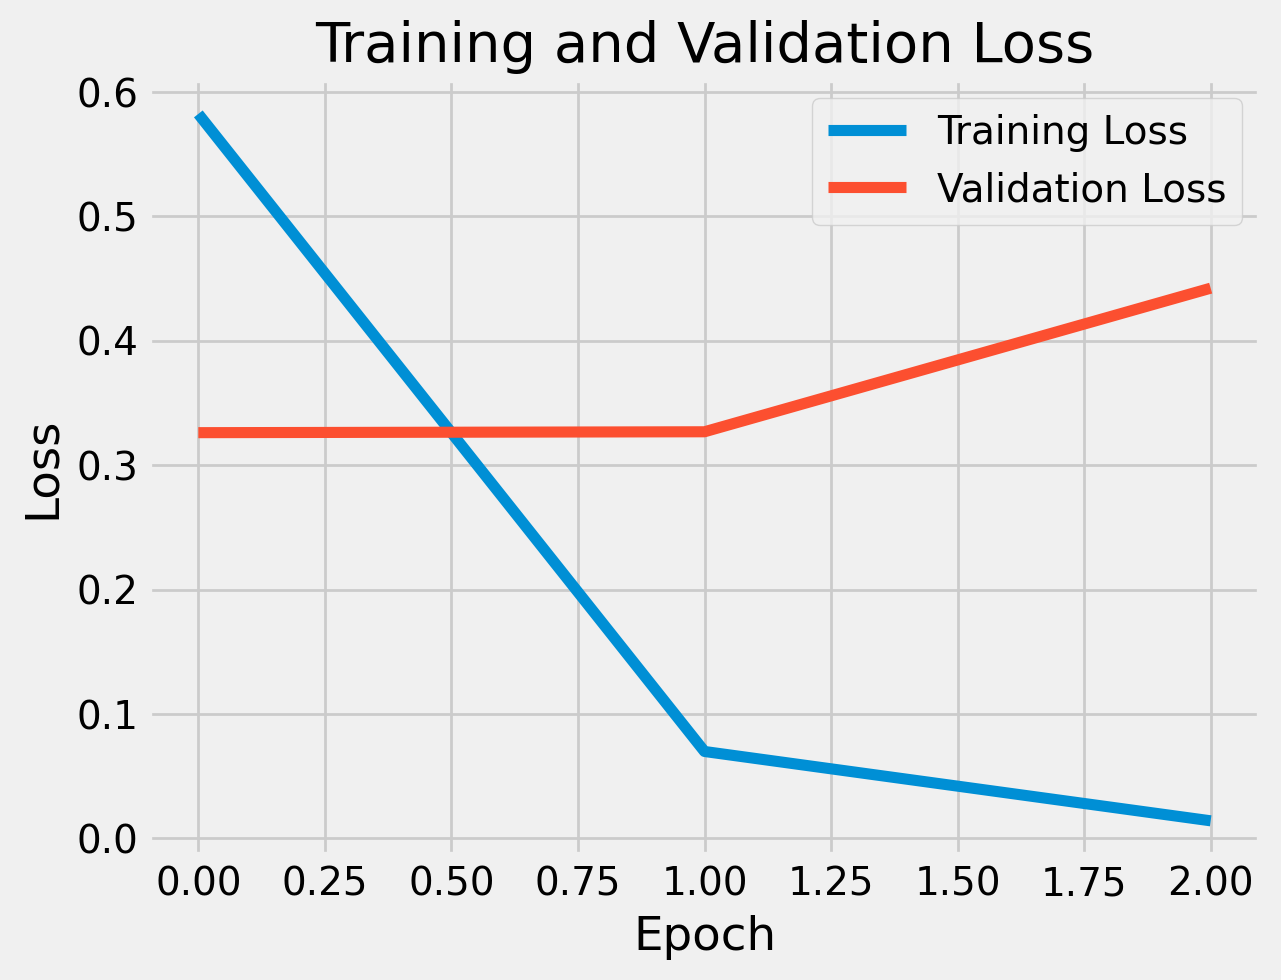

In [36]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

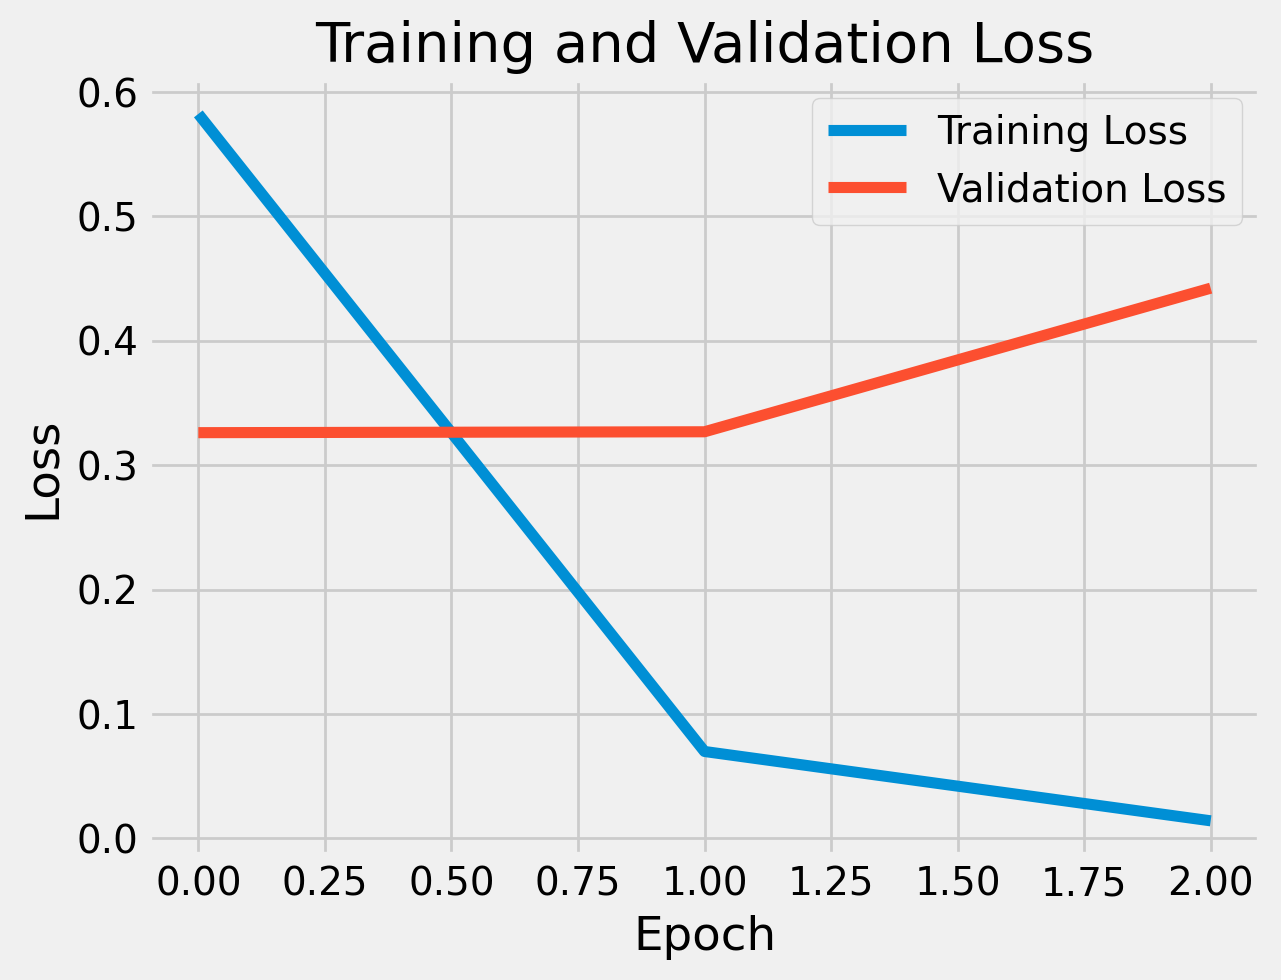

In [37]:
# Graficar curva de pérdida
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

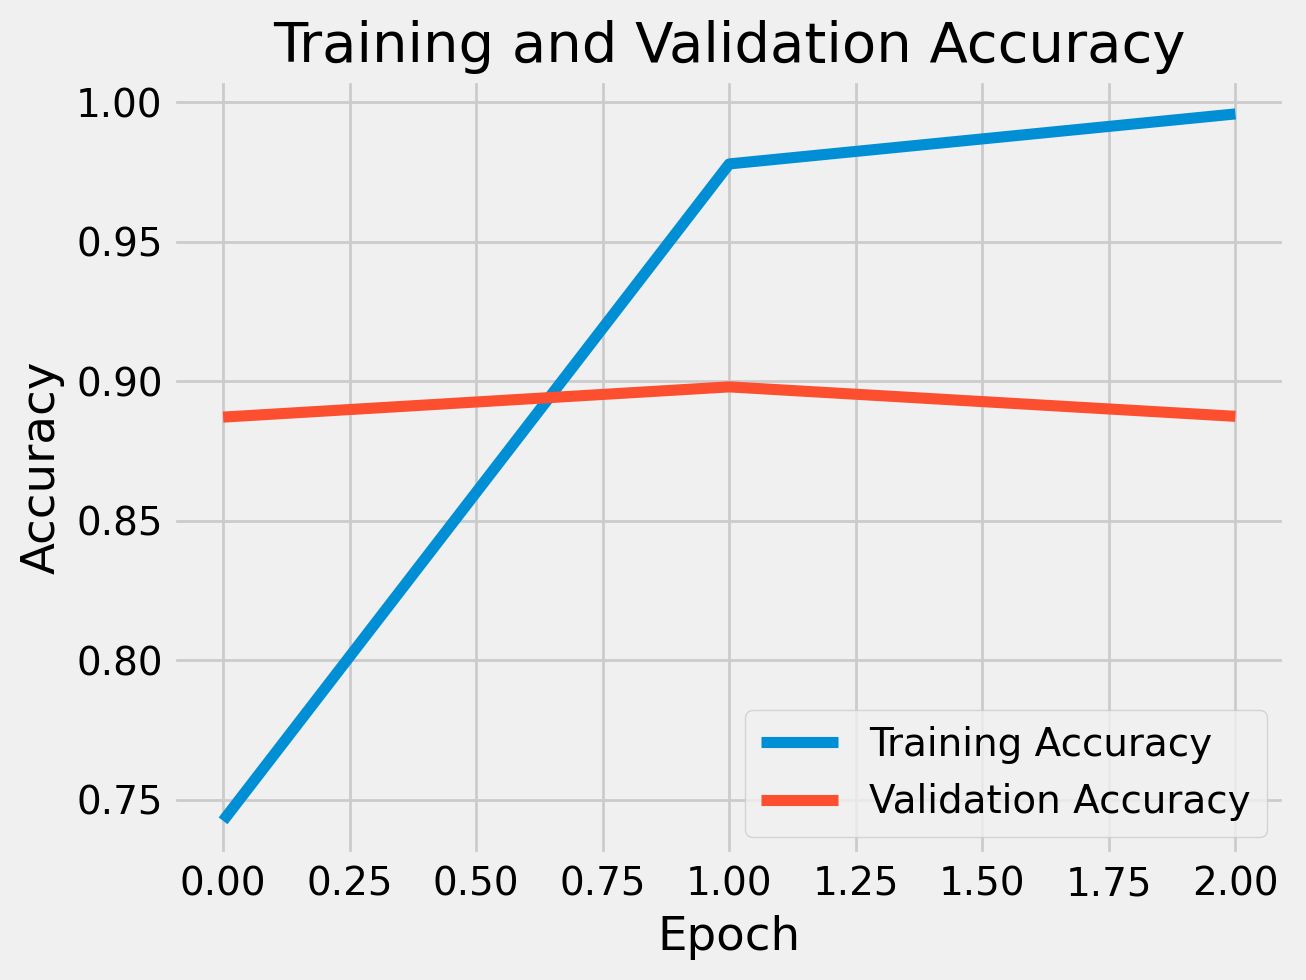

In [38]:
# Graficar curva de precisión (si el modelo tiene métricas de precisión)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Forecast of the sentiment

In [40]:
from keras.layers import LSTM, Dense
from statsmodels.tsa.arima.model import ARIMA
import lightgbm as lgb

In [74]:
df.head()

_ids             user  \
0  1467810369  _TheSpecialOne_   
1  1467810672    scotthamilton   
2  1467810917         mattycus   
3  1467811184          ElleCTF   
4  1467811193           Karoli   

                                               tweet       time        Date  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...  22:19:45   2009-04-06   
1  is upset that he can't update his Facebook by ...  22:19:49   2009-04-06   
2  @Kenichan I dived many times for the ball. Man...  22:19:53   2009-04-06   
3    my whole body feels itchy and like its on fire   22:19:57   2009-04-06   
4  @nationwideclass no, it's not behaving at all....  22:19:57   2009-04-06   

   Month                                         clean_text  sentiment_score  \
0      4       awww bummer shoulda got david carr third day            0.200   
1      4  upset update facebook texting might cry result...            0.000   
2      4  dived many time ball managed save 50 rest go b...            0.500   
3      4                    whole body feel itchy like fire            0.200   
4      4                                   behaving mad see           -0.625   

   scaled_sentiment  
0            0.6000  
1            0.5000  
2            0.7500  
3            0.6000  
4            0.1875

In [84]:
df['clean_text'].fillna('N/A', inplace=True)

In [85]:
print(df.isnull().sum())

_ids                0
user                0
tweet               0
time                0
Date                0
Month               0
clean_text          0
sentiment_score     0
scaled_sentiment    0
dtype: int64
